# 实验 3.2 - 学员笔记本

## 概述

本实验是模块 3 引导式实验的延续。

## 业务场景简介

您在一家医疗保健服务提供商工作，并希望改善骨科患者的异常检测。

您的任务是利用机器学习 (ML) 解决此问题。您可以使用包含六个生物力学特征且目标为*正常*或*异常*的数据集。您可以使用此数据集训练 ML 模型，以预测患者是否会出现异常。

## 关于该数据集
该生物医学数据集由 Henrique da Mota 博士在法国里昂 Médico-Chirurgical de Réadaptation des Massues 中心的整形外科应用研究组 (GARO) 实习期间创建。这些数据分到两个不同但相关的分类任务中。

第一项任务是将患者归类为以下三类之一： 

- *正常*（100 名患者）
- *椎间盘疝*（60 名患者）
- *脊椎滑脱*（150 名患者）

对于第二个任务，则是将*椎间盘疝*和*脊椎滑脱*合并为一个类别，标记为*异常*。因此，在第二个任务中，患者属于以下两个类别之一：*正常*（100 名患者）或*异常*（210 名患者）。


## 属性信息

数据集中的每名患者都由六个生物力学属性表示，这些属性（顺序如下）是根据骨盆和腰椎的形状和方向得出的： 

- 骨盆入射角
- 骨盆倾斜角
- 腰椎前凸角
- 骶骨倾斜角
- 骨盆半径
- 脊椎滑脱等级

以下约定用于分类标签： 
- 椎间盘疝 (DH)
- 脊椎滑脱 (SL)
- 正常 (NO) 
- 异常 (AB)


有关此数据集的更多信息，请参阅[脊柱数据集网页](http://archive.ics.uci.edu/ml/datasets/Vertebral+Column)。

## 数据集属性
该数据集来自：
Dua, D. 和 Graff, C.（2019 年）。UCI 机器学习存储库 (http://archive.ics.uci.edu/ml)。加州尔湾市：加利福尼亚大学信息与计算机科学学院。


# 实验设置
由于此解决方案分散在模块中的多个实验中，因此您需要执行以下单元格中的内容，以便加载数据：

## 导入数据

In [4]:
import warnings, requests, zipfile, io
warnings.simplefilter('ignore')
import pandas as pd
from scipy.io import arff

In [5]:
f_zip = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00212/vertebral_column_data.zip'
r = requests.get(f_zip, stream=True)
Vertebral_zip = zipfile.ZipFile(io.BytesIO(r.content))
Vertebral_zip.extractall()

In [6]:
data = arff.loadarff('column_2C_weka.arff')
df = pd.DataFrame(data[0])

# 步骤 1：探索数据
您将从查看数据集中的数据开始。

为了充分利用本实验，在执行单元格中的内容之前，请仔细阅读说明和代码。花点时间进行实验！

首先，您将使用 **shape** 来检查行数和列数。

In [7]:
df.shape

(310, 7)

现在，您将获取列的列表。

In [8]:
df.columns

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

您可以看到六个生物力学特征，目标列名为 *class*。

您有哪些列类型？

In [9]:
df.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

六个生物力学特征使用浮点数，但目标是分类。

要查看第一列的统计数据，可以使用 **describe** 函数。

In [10]:
df['pelvic_incidence'].describe()

count    310.000000
mean      60.496653
std       17.236520
min       26.147921
25%       46.430294
50%       58.691038
75%       72.877696
max      129.834041
Name: pelvic_incidence, dtype: float64

**挑战任务**：尝试更新上一个单元格中的代码以查看其他特征的统计数据。哪些特征可能具有需要检查的离群值？

由于此数据集只有六个特征，因此可以通过对整个 DataFrame 运行 **describe** 来显示每个特征的统计数据。

In [11]:
df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


**问题**：是否存在分布不均衡的特征？ 是否存在您想要查看的具有离群值的特征？ 看起来特征之间存在相关性吗？

仅查看数字时，观察并不总是那么容易，因此现在您将给这些值绘图。

Matplotlib is building the font cache; this may take a moment.


<Axes: >

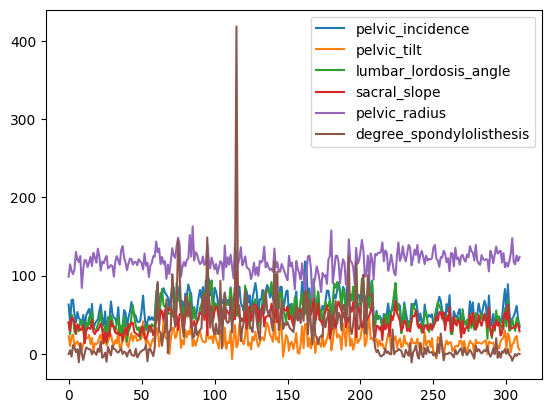

In [12]:
import matplotlib.pyplot as plt
# %matplotlib inline
df.plot()

现在，您将使用*密度或核密度估计 (KDE) 图*来绘制每个特征的值分布。

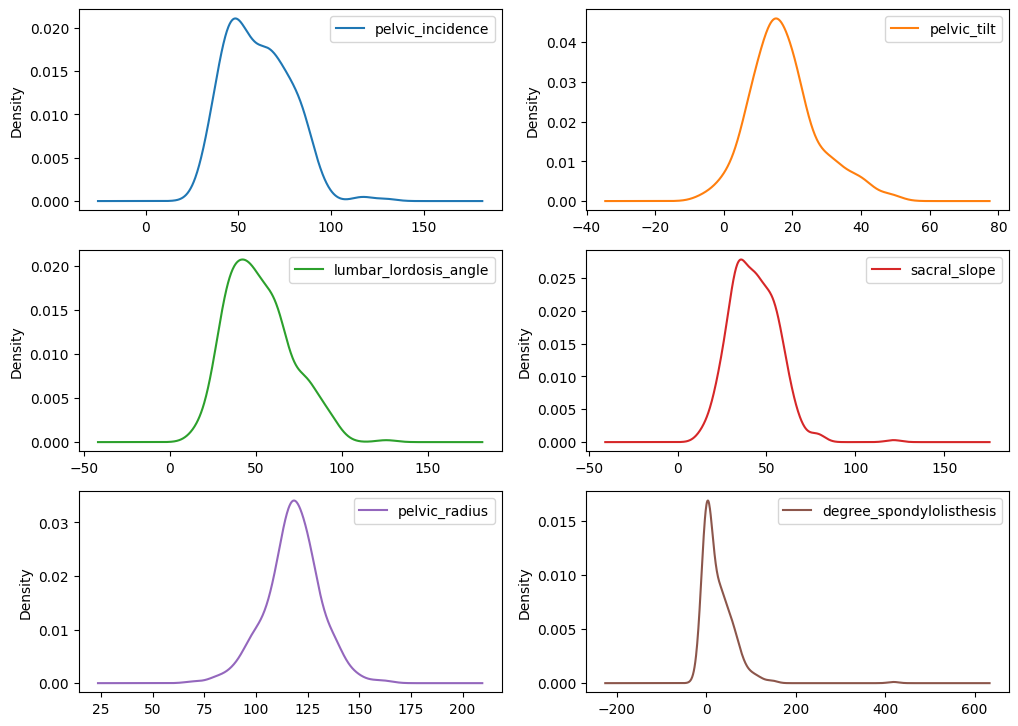

In [13]:
df.plot(kind='density',subplots=True,layout=(4,2),figsize=(12,12),sharex=False)
plt.show()

这些图形中是否存在特别值得注意的地方？

### 调查 degree_spondylolisthesis
现在，您将调查 **degree_spondylolisthesis**：

从*密度图*开始，如果您还记得的话，它会显示*值的分布*。

<Axes: ylabel='Density'>

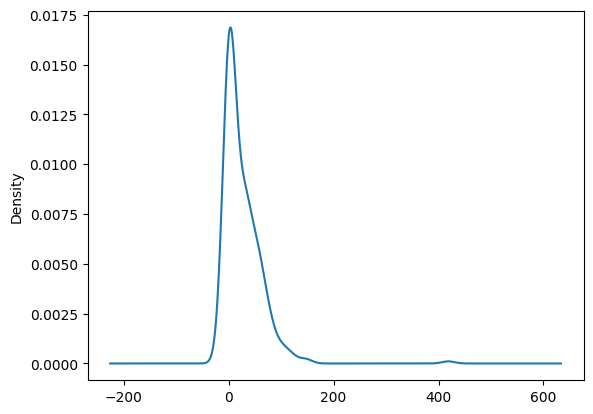

In [14]:
df['degree_spondylolisthesis'].plot.density()

密度图可使曲线平滑。看起来可能存在大约 **400** 的增长。使用*直方图*可视化数据。

<Axes: ylabel='Frequency'>

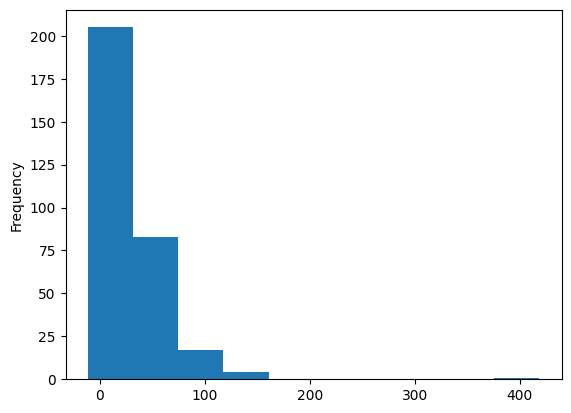

In [15]:
df['degree_spondylolisthesis'].plot.hist()

通过使用*箱线图*，您可以看出是否存在离群值。

In [ ]:
df['degree_spondylolisthesis'].plot.box()

您会看到 **400** 左右的小幅增长。有时，像这样的离群值可能会使训练模型出现偏差。找出会否造成偏差的唯一方法是，分别使用含有离群值和不含有离群值数据测试模型，并比较模型的分数。但这个任务在之后的实验中才会讨论。

您可以从箱线图中看出，在*看上去*是最大值的值之上存在一簇数据点。这些数据点与目标之间是否存在相关性？

在寻找相关性之前，您将进一步分析目标。

### 分析目标

首先目前的分布是什么样的？

In [ ]:
df['class'].value_counts()

目前的分布似乎是大约 1/3 *正常*和 2/3 *异常*。这个结果应该还可以，但是如果您可以获得更多数据，则会希望尝试进一步平衡这些数字。

类值不适用于您的 ML 模型，因此您需要将该列转换为数值。您可以将 *mapper* 用于此任务。

In [ ]:
class_mapper = {b'Abnormal':1,b'Normal':0}
df['class']=df['class'].replace(class_mapper)

现在，您可以绘制 *degree_spondylolisthesis* 和目标的图。

In [ ]:
df.plot.scatter(y='degree_spondylolisthesis',x='class')

您看到了什么？

尽管高值和异常值之间似乎存在联系，但也有许多处于相同范围内的值。因此，可能存在相关性，但值得进一步研究数据。

**挑战任务**：通过使用先前的单元格，确定其他特征的值与目标的关系。

### 可视化多个变量

如前面的步骤所示，可视化可能非常有用。有时，您需要分析多个数据点。这时可以使用 *groupby*。

并排绘制特征的*异常*和*正常*值的图可能可以帮助您观察其他差异。

In [ ]:
df.groupby('class').boxplot(fontsize=20,rot=90,figsize=(20,10),patch_artist=True)

借助 **corr** 函数，您可以为整个数据集创建一个相关矩阵。

In [ ]:
corr_matrix = df.corr()
corr_matrix["class"].sort_values(ascending=False)

您也可以绘制此数据的图。

In [ ]:
pd.plotting.scatter_matrix(df,figsize=(12,12))
plt.show()

通过使用 **seaborn**，您可以将相关性可视化为*热图*。

In [ ]:
import seaborn as sns
# Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
# Generate Color Map
# colormap = sns.diverging_palette(220, 10, as_cmap=True)
colormap = sns.color_palette("BrBG", 10)
# Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr_matrix, cmap=colormap, annot=True, fmt=".2f")
#ax.set_yticklabels(column_names);
plt.show()

**挑战任务**：从 UCI 机器学习存储库中查找其他数据。使用前面的代码作为参考，开始探索吧！


# 恭喜！

您已经完成了本实验，现在可以按照实验指南中的说明结束本实验。